In [12]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap5
/Users/jinceyang/Desktop/codebase/ml/learn_d2l already in Python path


In [13]:
import importlib
from d2l.classification.model import MLPClassifierTorch
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.optimizer import SGDOptimizer
from d2l.base.plot import plot_loss, show_images
from d2l.base.utils import mps
from typing import List
from matplotlib import pyplot as plt

In [14]:
import torch

In [15]:
rng = torch.Generator().manual_seed(42)

In [16]:
data = FashionMNISTDataset()
mlp_model = MLPClassifierTorch(
    num_features=784, 
    num_outputs=10, 
    num_hiddens=[256, 256],
    rng=rng
)

In [17]:
# Let's check the shape of the data
train_loader = data.get_train_dataloader(256)
for X, y in train_loader:
    print(f"Input shape: {X.shape}")
    print(f"Label shape: {y.shape}")
    break

Input shape: torch.Size([256, 1, 28, 28])
Label shape: torch.Size([256])


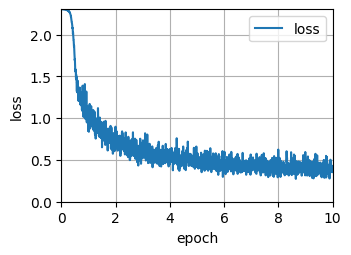

In [18]:
trainer = Trainer(model=mlp_model, optimizer=torch.optim.SGD(mlp_model.parameters(), lr=0.1))
all_epoch_losses = trainer.train(data.get_train_dataloader_epochs(256, 10))
fig, ax = plt.subplots()
plot_loss(ax, all_epoch_losses)

In [19]:
evaluator = ClassificationEvaluator(mlp_model)
test_loss = evaluator.loss(data.get_test_dataloader(256))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(256))
print(f'Test accuracy: {accuracy:.2%}')

Test loss: 0.4629
Test accuracy: 82.74%


In [20]:
(X, y) = next(iter(data.get_test_dataloader(batch_size=18)))

In [21]:
y_hat = mlp_model.predict(X)
print('Predicted labels:', data.get_text_labels(y_hat.tolist()))
print('True labels:     ', data.get_text_labels(y.tolist()))
print(f'accuracy: {(y_hat == y).sum() / y.numel():.2%}')

Predicted labels: ['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser', 'coat', 'shirt', 'sandal', 'sneaker', 'coat', 'sandal', 'sandal', 'dress', 'coat', 'trouser', 'pullover', 'shirt']
True labels:      ['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser', 'coat', 'shirt', 'sandal', 'sneaker', 'coat', 'sandal', 'sneaker', 'dress', 'coat', 'trouser', 'pullover', 'coat']
accuracy: 88.89%
